In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_epi_data(fileName, popData):
    epiOData = np.genfromtxt(fileName, delimiter=',', skip_header= 0)
    start= 1
    requireNum= 30
    print(epiOData.shape)
    epiOData = epiOData[start:start+requireNum,1:]
    epiODataNew= np.zeros((requireNum,epiOData.shape[1]))
    epiODataNew[requireNum-epiOData.shape[0]:, :]= epiOData.copy()
    epiOData = epiODataNew
    epiData= epiOData.copy()/popData[None, :]
    epiNewData = epiData.copy()
    epiNewData[1:, :] = epiNewData[1:, :]-epiNewData[:-1, :]
    # print(np.sum(epiNewData<0))
    epiNewData[epiNewData<0]= 0
    sumEpiData= np.sum(epiOData, axis= 0)
    ranked_indices = np.argsort(sumEpiData)
    return epiOData, epiData, ranked_indices
Epi= "covid" # sars, covid, H1N1
# Read the CSV file into a NumPy array
popData = np.genfromtxt('empirical_data/populations.csv', delimiter=',', skip_header= 0)
file_path = 'empirical_data/Country_Population_final.csv'
data = pd.read_csv(file_path)
popName= data["Country"].tolist()
epiODataSars, epiDataSars, ranked_indices_Sars= read_epi_data('empirical_data/infected_numbers_sars.csv', popData)
epiODataH1N1, epiDataH1N1, ranked_indices_H1N1= read_epi_data('empirical_data/infected_numbers_H1N1.csv', popData)
epiODataCovid, epiDataCovid, ranked_indices_Covid= read_epi_data('empirical_data/infected_numbers_covid.csv', popData)
ranked_pop= np.argsort(popData)

(97, 235)
(51, 235)
(159, 235)


92


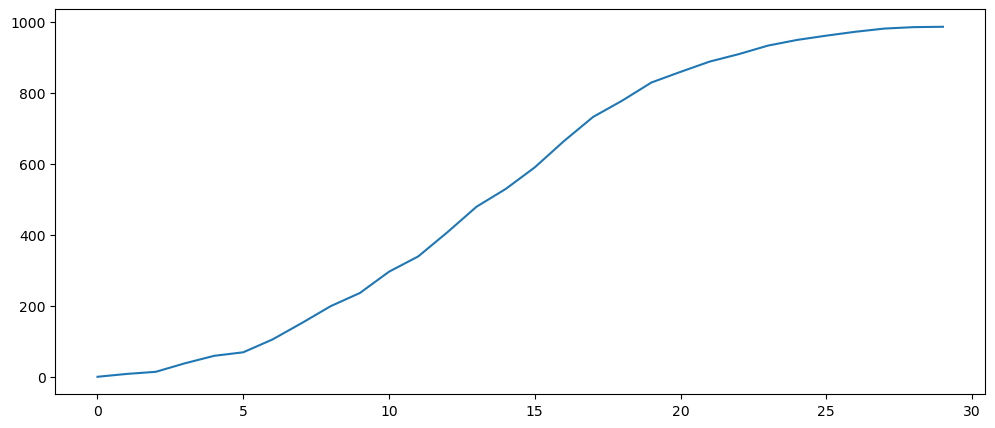

In [2]:
lastUsed= -5 #84
usedIdx= set(ranked_indices_Covid[-80:]).union(set(ranked_indices_Sars[-10:])).union(set(ranked_indices_H1N1[-21:]))
print(len(usedIdx))
plt.figure(figsize=(12, 5))
plt.plot(epiODataCovid[: , ranked_indices_Covid[-1]])

In [3]:
print(usedIdx)
testEpiData= np.concatenate([epiODataSars[:, np.array(list(usedIdx))], 
                             epiODataH1N1[:, np.array(list(usedIdx))], 
                             epiODataCovid[:, np.array(list(usedIdx))] ])
print(testEpiData.shape)
testPopData= popData[np.array(list(usedIdx))]
print(testPopData.shape)
np.savetxt(f'testData/test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop_inx.csv', np.array(list(usedIdx)), delimiter=',', fmt='%d')

{3, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 29, 50, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 126, 130, 134, 146, 147, 148, 149, 151, 152, 156, 183, 189, 190, 191, 193, 196, 199, 200, 203, 206, 207, 210, 213, 233}
(90, 92)
(92,)
